# Imports


In [40]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.19.0


# Load the Fashion MNIST dataset

contains 70,000 grayscale images in 10 categories

In [41]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:
  - train_images, train_labels are the training set
  - test_images, test_labels are the test set
  
images have a 28 x 28 size with pixel values from 0 to 255.
Labels are an array of integers, ranging from 0 to 9.
Each image is mapped to a single name, we have to define the class names:

In [42]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Briefly Explore the data

In [43]:
# training set shape:
print('Training set image dimension:',str(train_images.shape))
print('Training set label dimension:',str(train_labels.shape))

# test set shape:
print('Test set image dimension:',str(test_images.shape))
print('Test set label dimension:',str(test_labels.shape))

Training set image dimension: (60000, 28, 28)
Training set label dimension: (60000,)
Test set image dimension: (10000, 28, 28)
Test set label dimension: (10000,)


# Data preprocessing

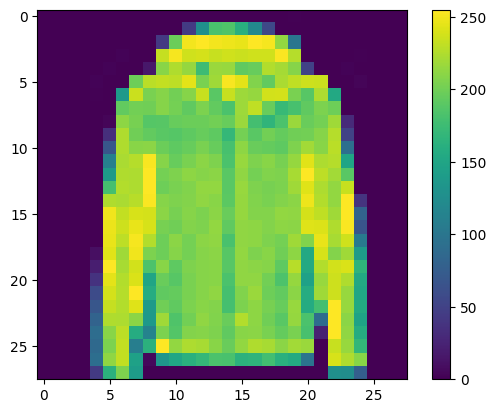

In [44]:
# Inspect one image
plt.figure()
plt.imshow(train_images[5000])
plt.colorbar()
plt.grid(False)
plt.show()


before feeding the data to the neural network model, we want to normalize them in a range of 0 to 1.

In [45]:
train_images = train_images / train_images.max()

test_images = test_images / train_images.max()


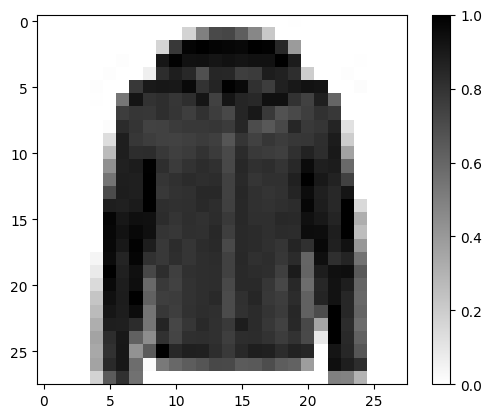

In [46]:
# Let's show new range
plt.figure()
plt.imshow(train_images[5000], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

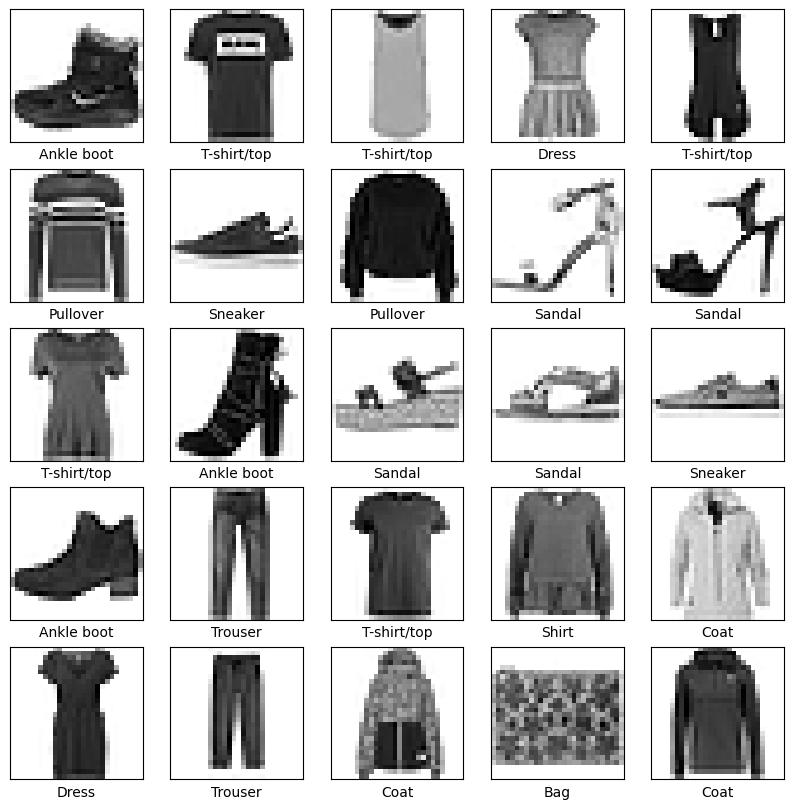

In [47]:
# Let's show the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#PART 1: Fully Connected Model

> Blocco con rientro






# Build the model: FILL THE CODE

Create a sequential model sequential consisting of

- Dense layer with 128 neurons and a relu activation
- Dense layer with 10 neurons and softmax activation

N.B. the input image must be flattened before being fed to the dense layers!


In [48]:
# Keras sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28), name='input'),
    tf.keras.layers.Dense(128, activation='relu', name='fc1'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
# Let's show the architecture of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model: FILL THE CODE
during this step we need to select a few settings:
    
    - Loss function: measures how the model is accurate
      during training (is what we want to minimize)
    - Optimizer: how the model is updated based on the data
      that it sees and loss function
    - Metrics: Used to monitor training and testing steps:
      Accuracy fraction of correctly classified images
      
Use Adam optimizer and a sparse_categorical_crossentropy loss, , use accuracy as a metric
      


In [50]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model: FILL THE CODE


To train the neural network model, we need to follow these steps:

    - 1. Feed training data to the model
    
    - 2. Model hopefully learns to associate images and labels

    - 3. Test model predictions on an "unseen" test set and verify accuracy
    
train the data for 10 epochs using the built-in training loop

In [51]:
model.fit(train_images, train_labels)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7831 - loss: 0.6360


# Evaluate Accuracy

In [52]:
# Check how model performs on test dataset
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 5ms/step - accuracy: 0.8360 - loss: 63.7540

Test accuracy: 0.8360000252723694


# Make Predictions

In [53]:
# Predictions over test set
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [54]:
# Show result
img_idx = 0 # Idx of image
print('Model output:',predictions[img_idx])
print('Predicted label:', np.argmax(predictions[img_idx]))
print('Ground truth label:',test_labels[img_idx])

Model output: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted label: 9
Ground truth label: 9


In [55]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

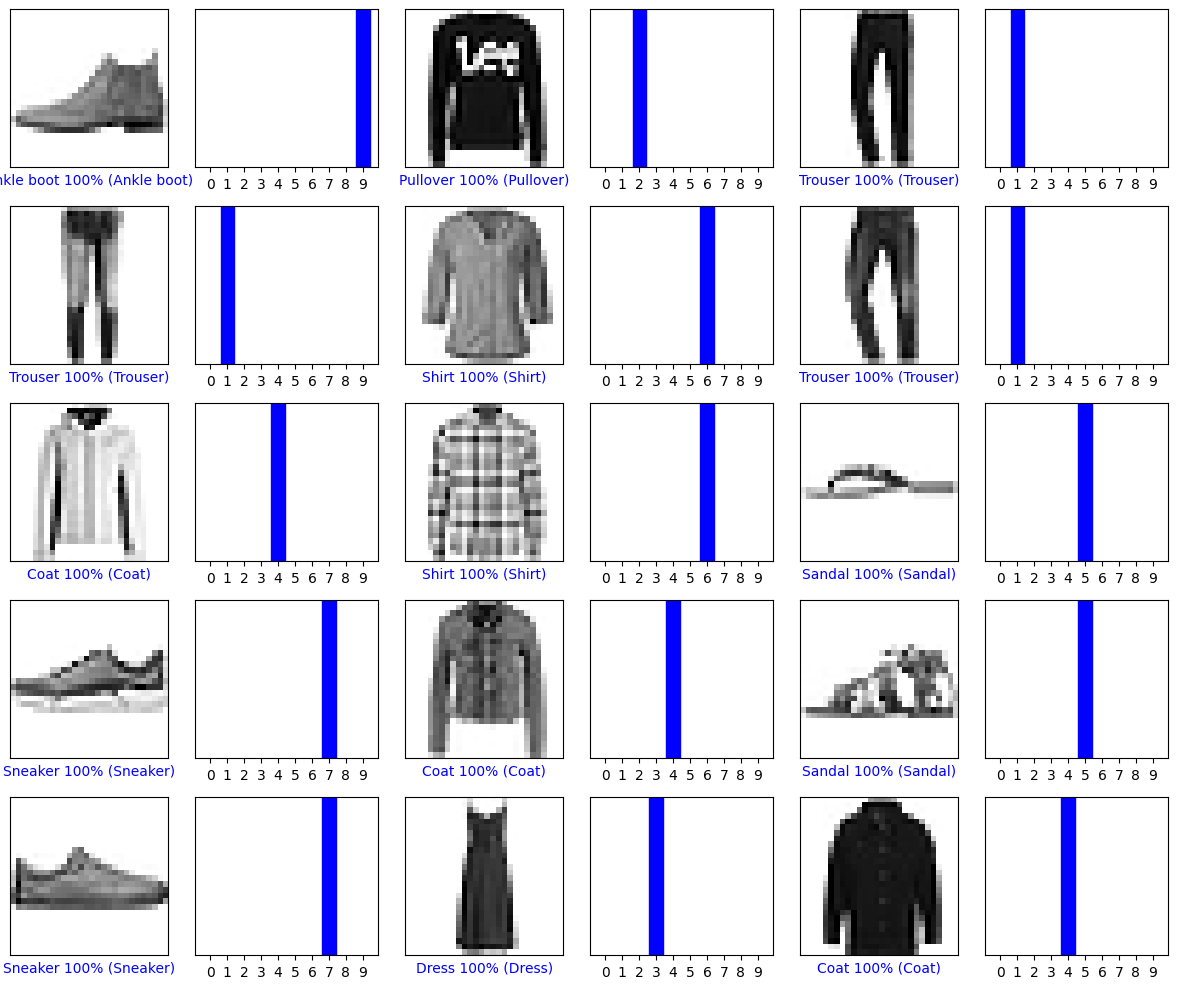

In [56]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Feature extraction
Let's check how we can extract the output of intermediate layers

In [57]:
extractor = keras.Model(inputs=model.inputs,
                        outputs = [layer.output for layer in model.layers])
features = extractor(test_images)

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_8']
Received: inputs=Tensor(shape=(10000, 28, 28))
  warnings.warn(msg)


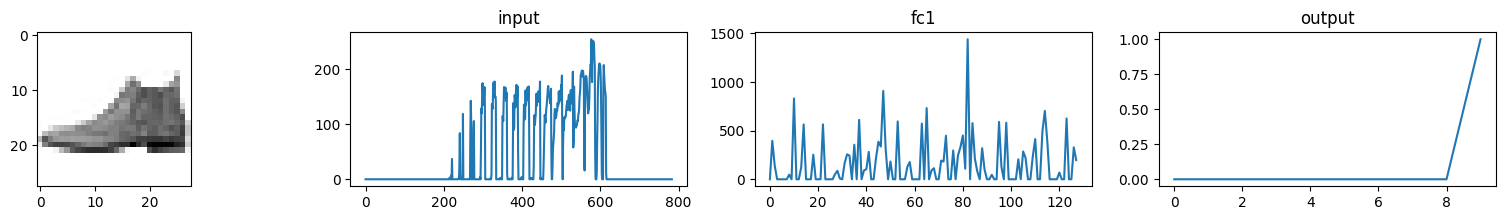

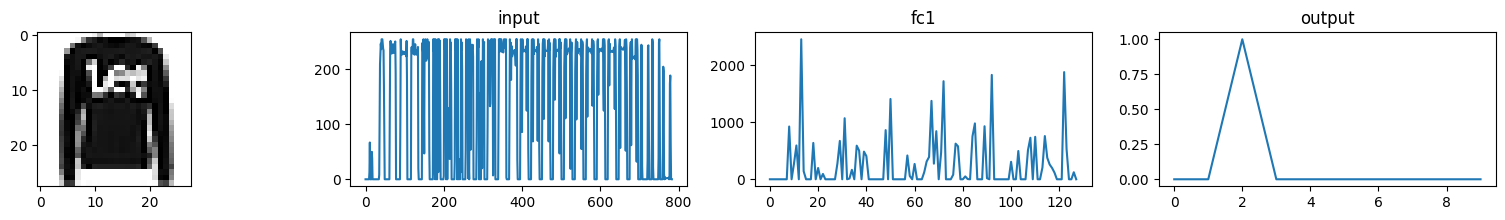

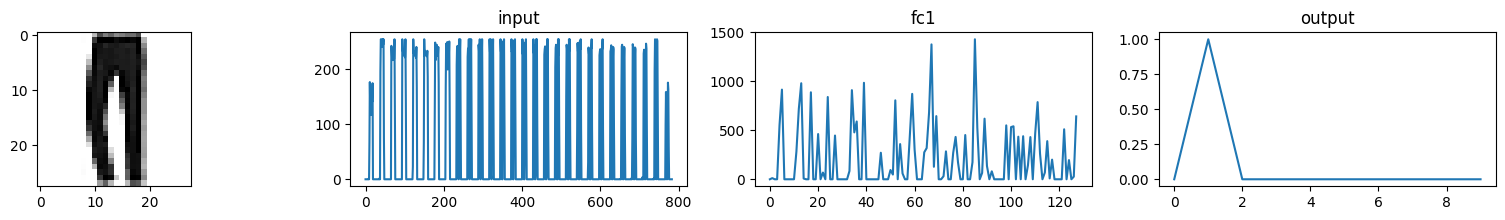

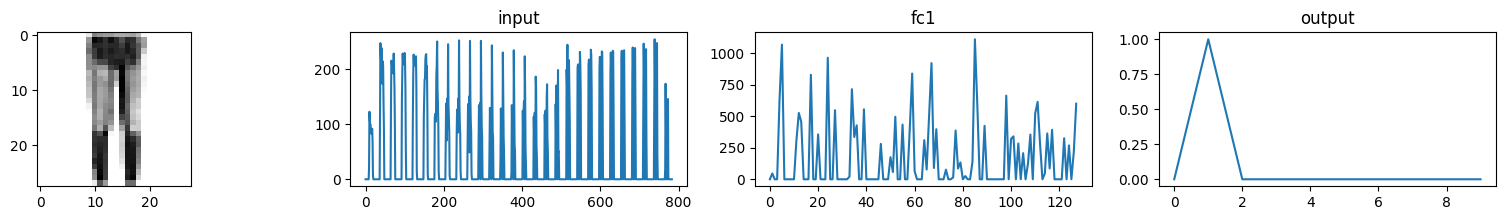

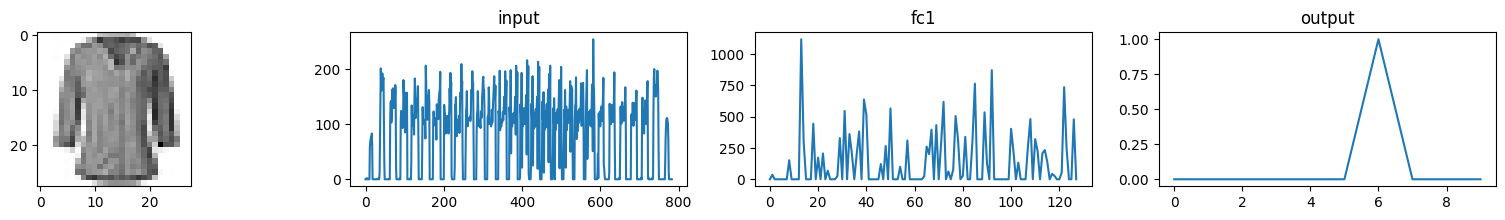

In [58]:
n_layers = len(model.layers)
layer_names = [layer.name for layer in model.layers]
num_images = 5
for i in range(0,num_images):
  plt.figure(figsize=(20, 2))
  plt.subplot(1,n_layers+1,1)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  for n_l in range(0,n_layers):
    plt.subplot(1,n_layers+1,n_l+2)
    #print(features[n_l].numpy().shape)
    plt.plot(features[n_l].numpy()[i])
    plt.title(layer_names[n_l])

#PART 2: Convolutional Model


#Image Resizing

Images are defined as 3D arrays consisting of $M$ rows, $N$ columns and $C$
channels

Two main type of images:


*   Grayscale images: $C=1$, the channel in this case may sometimes be omitted
*   RGB images: $C=3$, each channel corresponds to one color Red, Green or Blue

If we consider $I$ as the number of images, there are two ways to represent the images:

* Channel last: $I\times M \times N \times C$
* Channel first: $I\times \times C M \times N $

We will use channel last since it is the way that tensorflow prefers.


In [59]:
print('Train images size:' +str(train_images.shape))
print('Test images size:' +str(test_images.shape))

Train images size:(60000, 28, 28)
Test images size:(10000, 28, 28)


In [60]:
train_images = tf.expand_dims(train_images,axis=3)
test_images = tf.expand_dims(test_images,axis=3)

print('Train images size:' +str(train_images.shape))
print('Test images size:' +str(test_images.shape))

Train images size:(60000, 28, 28, 1)
Test images size:(10000, 28, 28, 1)


# Build the convolutional Network: FILL THE CODE

Create a sequential model sequential consisting of

- Conv2D layer with 64 filters and a relu activation
- Conv2D layer with 32 filters and a relu activation
- Dense layer with 10 neurons and a softmax activation           

(Use kernels of size (4,4), stride of size (2,2) and 'same' for the padding)

N.B. the input image must be flattened before being fed to the dense layers!
N.B. on the first layer input dimension must be specified


In [65]:
# Keras sequential model
conv_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1), name='input'),
    tf.keras.layers.Conv2D(64, (4,4), strides=(2,2), padding='same', activation='relu', name='conv1'),
    tf.keras.layers.Conv2D(32, (4,4), strides=(2,2), padding='same', activation='relu', name='conv2'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [66]:
# Let's show the architecture of the model
conv_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 14, 14, 64)     │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 7, 7, 32)       │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7, 7, 10)       │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,218 (133.66 KB)

 Trainable params: 34,218 (133.66 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model: FILL THE CODE

use adam optimizer and sparse_categorical_crossentropy loss, use accuracy as a metric



In [73]:
conv_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Train the model: FILL THE CODE

Train the convolutional model for 10 epochs using the built-in training loop

In [69]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8583 - loss: 0.3930
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8745 - loss: 0.3444
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8871 - loss: 0.3135
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8897 - loss: 0.3008
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8965 - loss: 0.2788
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8986 - loss: 0.2725
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9049 - loss: 0.2565
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9092 - loss: 0.2422
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9118 - loss: 0.2391
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9154 - loss: 0.2253


In [74]:
# Check how model performs on test dataset
test_loss, test_acc = conv_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None,), output.shape=(None, 7, 7, 10)

# Make predictions

In [ ]:
# Predictions over test set
predictions = conv_model.predict(test_images)

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images[:,:,:,0])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Feature Extraction

In [ ]:
extractor = keras.Model(inputs=conv_model.inputs,
                        outputs = [layer.output for layer in conv_model.layers])
features = extractor(test_images)

In [ ]:
n_layers = len(conv_model.layers)
layer_names = ['conv1','conv2','flatten','output']
num_images = 5
for i in range(0,num_images):
  plt.figure(figsize=(20, 2))
  plt.subplot(1,n_layers+1,1)
  plt.imshow(test_images[i,:,:,0], cmap=plt.cm.binary)
  for n_l in range(0,n_layers):
    plt.subplot(1,n_layers+1,n_l+2)
    if len(features[n_l].numpy().shape) == 4:
      plt.imshow(np.mean(features[n_l].numpy()[i,:,:,:], axis=2), cmap=plt.cm.binary)
    else:
      plt.plot(features[n_l].numpy()[i])
    plt.title(layer_names[n_l])

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE